<a href="https://colab.research.google.com/github/sdxvamp2/weatherwise-sayed/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing

In [4]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 37f1304bd6b0404eaf43c2a85e90308a.Sd5-TJ6KS6PvhxD-uL6HoANZ


## 📦 Setup and Configuration
Import required packages and setup environment.

In [9]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [18]:
import requests

def get_weather_data(location, forecast_days=5):


    if forecast_days < 1 or forecast_days > 5:
        forecast_days = 3

    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        current = data.get("current_condition", [{}])[0]
        forecast = data.get("weather", [])[:forecast_days]

        weather_info = {
            "location": location,
            "current": {
                "temp_C": current.get("temp_C"),
                "humidity": current.get("humidity"),
                "description": current.get("weatherDesc", [{}])[0].get("value"),
            },
            "forecast": []
        }

        for day in forecast:
            weather_info["forecast"].append({
                "date": day.get("date"),
                "avgtempC": day.get("avgtempC"),
                "maxtempC": day.get("maxtempC"),
                "mintempC": day.get("mintempC"),
                "sunrise": day.get("astronomy", [{}])[0].get("sunrise"),
                "sunset": day.get("astronomy", [{}])[0].get("sunset"),
            })

        return weather_info

    except requests.RequestException as e:
        return {"error": f"Unable to fetch weather data: {e}"}


## 📊 Visualisation Functions

In [22]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='scatter'):
    """
    Create a scatter plot for maximum and minimum temperatures over forecast days.

    Args:
        weather_data (dict): Weather data returned from get_weather_data()
        output_type (str): Type of chart to produce ('scatter' or 'line')

    Returns:
        str: Success message once plot is shown or saved.
    """

    if "error" in weather_data:
        print(weather_data["error"])
        return

    dates = [day['date'] for day in weather_data['forecast']]
    max_temps = [float(day['maxtempC']) for day in weather_data['forecast']]
    min_temps = [float(day['mintempC']) for day in weather_data['forecast']]

    plt.figure(figsize=(8, 5))
    plt.title(f"Temperature Forecast for {weather_data['location'].title()}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")

    if output_type == 'scatter':
        # Scatter plot for max and min temps
        plt.scatter(dates, max_temps, color='red', label='Max Temp')
        plt.scatter(dates, min_temps, color='blue', label='Min Temp')
    else:
        # Optional: fallback to line plot if user wants
        plt.plot(dates, max_temps, 'r-o', label='Max Temp')
        plt.plot(dates, min_temps, 'b-o', label='Min Temp')

    # Add data labels (optional, can comment out if too crowded)
    for i, txt in enumerate(max_temps):
        plt.text(dates[i], max_temps[i] + 0.5, f"{txt}°", ha='center', fontsize=8, color='red')
    for i, txt in enumerate(min_temps):
        plt.text(dates[i], min_temps[i] - 1, f"{txt}°", ha='center', fontsize=8, color='blue')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



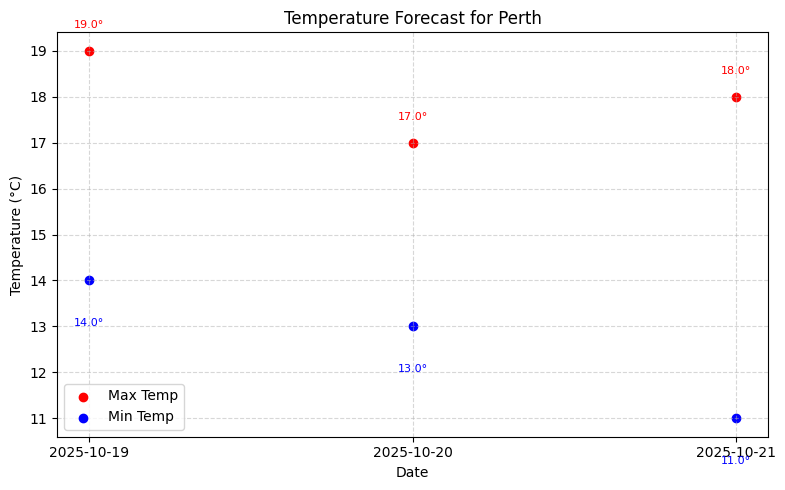

None


In [23]:
weather_data = get_weather_data('perth', 3)
print(create_temperature_visualisation(weather_data))

In [26]:
import matplotlib.pyplot as plt

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a histogram of daily precipitation values.

    Args:
        weather_data (dict): Processed weather data returned by get_weather_data()
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        If output_type == 'figure': returns matplotlib figure object.
        Otherwise, displays histogram in notebook.
    """

    if not weather_data or "forecast" not in weather_data:
        print("Invalid or missing weather data.")
        return None

    # --- Extract daily average precipitation values (in mm) ---
    avg_precip = []
    for day in weather_data['forecast']:
        if "hourly" in day:
            daily_precip = sum(float(h['precipMM']) for h in day['hourly']) / len(day['hourly'])
            avg_precip.append(round(daily_precip, 2))
        else:
            avg_precip.append(0.0)

    # --- Create histogram ---
    fig, ax = plt.subplots(figsize=(8, 5))
    bins = range(0, int(max(avg_precip)) + 2, 1)  # bin width = 1 mm
    ax.hist(avg_precip, bins=bins, color='cornflowerblue', edgecolor='black', alpha=0.8)

    # Labels and formatting
    ax.set_title(f"Histogram of Daily Precipitation – {weather_data['location'].title()}", fontsize=12, pad=10)
    ax.set_xlabel("Precipitation Range (mm)")
    ax.set_ylabel("Number of Days")
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Annotate each bar with count
    counts, edges = np.histogram(avg_precip, bins=bins)
    for count, x in zip(counts, edges):
        if count > 0:
            ax.text(x + 0.5, count + 0.05, str(count), ha='center', fontsize=8, color='black')

    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return "Precipitation histogram displayed successfully!"


NameError: name 'np' is not defined

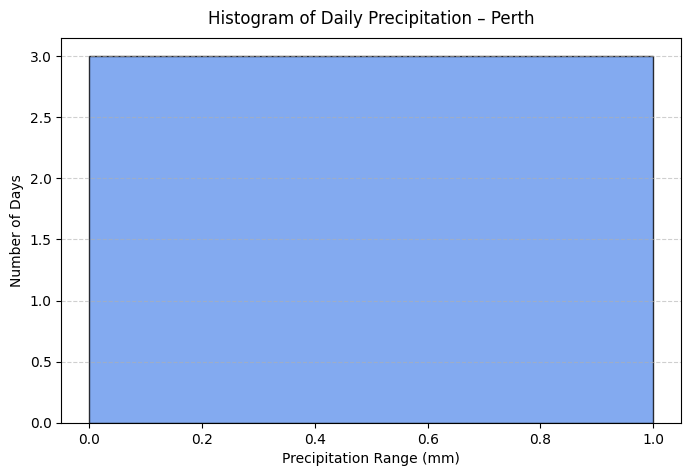

In [27]:
weather_data = get_weather_data('perth', 3)
print(create_precipitation_visualisation(weather_data))

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.